# Gender Classification Using ConvNets

BINARY CLASSIFIER

### IMPORTING THE LIBRARIES

In [68]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

### DATA PRE-PROCESSING

#### PREPROCESSING THE TRAINING SET

In [69]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    shear_range=0.3,
                                    zoom_range=0.3)

In [70]:
# PREPROCESSING THE TRAINING SET
training_set = train_datagen.flow_from_directory(r"c:\Users\nehak\Project 12- Gender Classification using ConvNets\Training",
                                                 target_size = (135, 135),
                                                 batch_size = 48,
                                                 class_mode = 'binary')

Found 43511 images belonging to 2 classes.


In [103]:
# PREPROCESSING THE TEST SET
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"c:\Users\nehak\Project 12- Gender Classification using ConvNets\Validation",
                                            target_size = (135, 135),
                                            batch_size = 48,
                                            class_mode = 'binary')


Found 11649 images belonging to 2 classes.


### BUILDING THE CNN MODEL

In [72]:
kernel_size=(3,3)

In [73]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(135,135,3),kernel_regularizer=regularizers.l2(0.001),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (3, 3),input_shape=(134,131,3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(128, (3, 3),input_shape=(134,131,3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(256, (3, 3),input_shape=(134,131,3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(512, (3, 3),input_shape=(134,131,3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten())

In [74]:
# DENSE LAYERS
model.add(Dense(128,activation='relu'))

In [75]:
# DROPOUT LAYER
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))

In [76]:
# OUTPUT LAYER
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 135, 135, 32)      896       
                                                                 
 activation_39 (Activation)  (None, 135, 135, 32)      0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 67, 67, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 67, 67, 64)        18496     
                                                                 
 activation_40 (Activation)  (None, 67, 67, 64)        0         
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 33, 33, 64)       0         
 g2D)                                                

In [77]:
# TRAINING THE CNN MODEL
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(training_set,steps_per_epoch=70,epochs=30,
                  validation_data=test_set,validation_steps=50)

Epoch 1/30
70/70 [==============================] - 141s 2s/step - loss: 0.7092 - acc: 0.5527 - val_loss: 0.6899 - val_acc: 0.5554
Epoch 2/30
70/70 [==============================] - 133s 2s/step - loss: 0.6858 - acc: 0.5533 - val_loss: 0.6374 - val_acc: 0.6467
Epoch 3/30
70/70 [==============================] - 131s 2s/step - loss: 0.6215 - acc: 0.6896 - val_loss: 0.4927 - val_acc: 0.7746
Epoch 4/30
70/70 [==============================] - 125s 2s/step - loss: 0.5489 - acc: 0.7336 - val_loss: 0.4881 - val_acc: 0.7771
Epoch 5/30
70/70 [==============================] - 124s 2s/step - loss: 0.4647 - acc: 0.8000 - val_loss: 0.3466 - val_acc: 0.8558
Epoch 6/30
70/70 [==============================] - 124s 2s/step - loss: 0.4196 - acc: 0.8158 - val_loss: 0.2849 - val_acc: 0.8938
Epoch 7/30
70/70 [==============================] - 124s 2s/step - loss: 0.3799 - acc: 0.8426 - val_loss: 0.2543 - val_acc: 0.9033
Epoch 8/30
70/70 [==============================] - 124s 2s/step - loss: 0.3294 - a

### ACCURACY & LOSS PLOTS

In [78]:
tf.keras.callbacks.History()
# list all data in history
print(history.history.keys())

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [79]:
epochs_range = range(30)

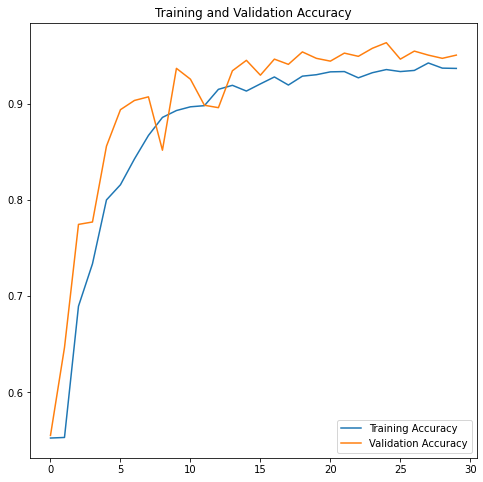

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.savefig("Gender-Accuracy.png")

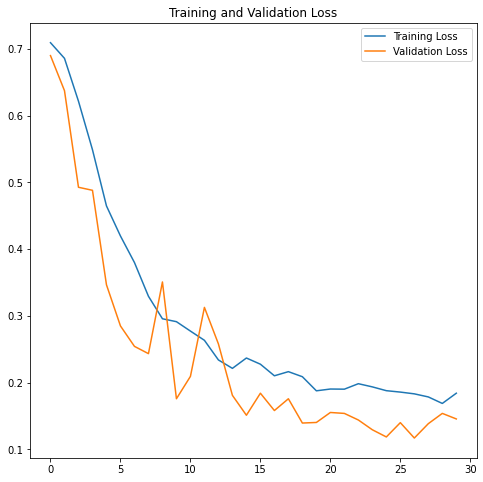

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("Gender-Loss.png")

In [115]:
actual=[]
for i in test_set[0][1]:
  actual.append(np.argmax(i))

In [116]:
predicted = model.predict(test_set[0][0])

In [117]:
predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [118]:
from sklearn.metrics import accuracy_score
print( "CNN Model's Accuracy", accuracy_score(actual, predict))

CNN Model's Accuracy 1.0


In [119]:
# TESTING THE MODEL ON CUSTOM IMAGES

from keras.preprocessing import image
test_image = image.load_img(r"c:\Users\nehak\Project 12- Gender Classification using ConvNets\Validation\female\112992.jpg.jpg",
                            target_size = (135, 135))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print(training_set.class_indices)
print(result)

{'female': 0, 'male': 1}
[[0.]]


In [120]:
if result[0][0] == 1:
    prediction = 'The prediction is a MALE'
else:
    prediction = 'The prediction is a FEMALE'
print(prediction)

The prediction is a FEMALE


In [121]:
model.save('Gender-Model.h5')

In [122]:
from keras.preprocessing import image
test_image = image.load_img(r"c:\Users\nehak\Project 12- Gender Classification using ConvNets\Validation\male\063474.jpg.jpg",
                            target_size = (135, 135))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print(training_set.class_indices)
print(result)

{'female': 0, 'male': 1}
[[1.]]


In [123]:
if result[0][0] == 1:
    prediction = 'The prediction is a MALE'
else:
    prediction = 'The prediction is a FEMALE'
print(prediction)

The prediction is a MALE
